In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [263]:
tracts_demo = gpd.read_file('../Data/tract_with_info_v2.shp')
tracts_demo.set_index('Tract',inplace=True)
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
Tract,,,,,,,,,,,,,,,,,,,,,
36005020000,4711,3310,2.759499,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,...,Bronx,E,020000,200,BX37,Van Nest-Morris Park-Westchester Square,3704,3.681096e+06,11070.413845,"POLYGON ((-73.84494 40.84822, -73.84489 40.847..."
36005020501,6976,5313,1.046445,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,...,Bronx,E,020501,205.01,BX36,University Heights-Morris Heights,3707,2.949066e+06,7565.836415,"POLYGON ((-73.92213 40.85048, -73.92168 40.850..."
36005020502,2160,1737,1.666667,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,...,Bronx,E,020502,205.02,BX36,University Heights-Morris Heights,3707,1.087824e+06,4437.182156,"POLYGON ((-73.91825 40.85303, -73.91797 40.852..."
36005020900,4287,3297,3.825519,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,...,Bronx,E,020900,209,BX63,West Concourse,3708,1.424319e+06,5201.927123,"POLYGON ((-73.91192 40.84326, -73.91195 40.843..."
36005021001,8930,7185,2.183651,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,...,Bronx,E,021001,210.01,BX46,Parkchester,3709,2.077080e+06,7202.143926,"POLYGON ((-73.85304 40.84074, -73.85314 40.840..."


In [264]:
tracts_demo.describe()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,%Edu_bac,index,shape_area,shape_leng
count,2055.000000,2055.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.055000e+03,2016.000000,2016.000000,2055.000000,2.055000e+03,2055.000000
mean,3865.899270,3062.829197,30.809432,23.824717,27.504339,14.590556,1.255685,2.015272,-2.134296e+07,82.430017,34.372483,1059.803893,3.308641e+06,8262.282707
std,2248.984208,1853.248725,28.642716,28.726896,22.708256,17.257360,3.048066,2.088858,1.175812e+08,10.847806,20.756885,624.839210,6.468465e+06,7895.553895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,20.000000,0.000000,1.000000,4.478078e+05,2816.869528
25%,2332.500000,1813.000000,3.869601,1.801321,9.747913,2.302249,0.000000,0.483275,4.502450e+04,75.240322,19.332267,515.500000,1.668107e+06,5582.053885
50%,3522.000000,2762.000000,20.829491,8.637677,18.927328,7.229804,0.303520,1.486221,6.416700e+04,84.209771,28.783611,1052.000000,1.950979e+06,6398.444238
75%,4898.000000,3854.500000,55.585249,40.118290,41.535953,21.221069,1.145257,2.860177,8.519500e+04,90.566492,44.516510,1601.500000,2.769594e+06,8104.528715
max,28109.000000,24166.000000,100.000000,100.000000,92.430905,91.605249,31.090573,20.276498,2.500010e+05,100.000000,100.000000,2164.000000,1.966544e+08,164119.583650


In [265]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', '%White', '%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac', 'index',
       'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry'],
      dtype='object')

In [266]:
tracts_demo['%NonWhite'] = tracts_demo[['%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed']].sum(axis = 1)

In [267]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', '%White', '%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac', 'index',
       'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', '%NonWhite'],
      dtype='object')

In [269]:
tracts_demo = tracts_demo[['Pop_Tot', 'Pop_18', '%White', '%NonWhite','%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac']]
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%NonWhite,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,%Edu_bac
Tract,,,,,,,,,,,,
36005020000,4711,3310,2.759499,97.240501,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,23.685801
36005020501,6976,5313,1.046445,98.953555,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,9.655562
36005020502,2160,1737,1.666667,98.333333,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,17.962003
36005020900,4287,3297,3.825519,96.174481,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,14.922657
36005021001,8930,7185,2.183651,97.816349,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,24.982603


In [270]:
len(tracts_demo)

2055

<AxesSubplot:>

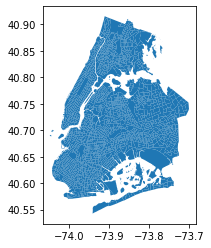

In [271]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [272]:
len(tracts_gdf)

2055

In [273]:
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [274]:
transit_access=pd.read_csv('../Data/weighted_tt.csv', index_col=1)
transit_access = transit_access.iloc[:, 1:]
transit_access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [275]:
len(transit_access)

2041

In [276]:
#merge
tract_info = transit_access.join(tracts_demo,how = 'left')
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,%White,%NonWhite,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,%Edu_bac
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,75.458778,24.541222,2.095316,9.832922,10.832649,0.136949,1.643385,129167,95.786940,76.482094
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,54.918033,45.081967,5.737705,11.475410,1.639344,22.950820,3.278689,-666666666,100.000000,67.647059
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,63.008631,36.991369,1.479655,9.001233,19.235512,6.041924,1.233046,125882,97.594937,81.392405
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,15.306122,84.693878,38.775510,0.000000,33.673469,0.000000,12.244898,95313,89.795918,44.897959
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,87.326494,12.673506,0.603500,5.461678,4.345202,0.603500,1.659626,196964,99.309869,83.850932


In [277]:
len(tract_info)

2041

In [278]:
perc_ls = ['%White', '%Black', '%Hispanic_', '%Asian','%Other', '%Mixed', '%Edu_hs', '%Edu_bac']
for perc_item in perc_ls:
    col_str = perc_item[1:]
    tract_info[col_str+'Tot'] = tract_info['Pop_Tot']*tract_info[perc_item]/100
    tract_info[col_str+'Above18'] = tract_info['Pop_18']*tract_info[perc_item]/100

In [279]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac',
       'WhiteTot', 'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAbove18', 'OtherTot',
       'OtherAbove18', 'MixedTot', 'MixedAbove18', 'Edu_hsTot',
       'Edu_hsAbove18', 'Edu_bacTot', 'Edu_bacAbove18'],
      dtype='object')

In [280]:
tract_info.describe()#head()

,ctlabel,boro_code,ct2010,boro_ct2010,puma,shape_leng,shape_area,Bus_Access,Subway_Access,Bus_Count,...,AsianTot,AsianAbove18,OtherTot,OtherAbove18,MixedTot,MixedAbove18,Edu_hsTot,Edu_hsAbove18,Edu_bacTot,Edu_bacAbove18
count,2041.000000,2041.000000,2041.000000,2.041000e+03,2041.000000,2041.000000,2.041000e+03,2041.000000,2041.000000,2041.000000,...,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,424.740318,2.875551,42474.031847,2.918025e+06,3962.139637,8094.577315,3.239953e+06,0.999020,0.572268,13.399314,...,561.884289,456.088435,42.344638,33.516142,79.371571,63.981883,3231.371410,2574.819950,1387.622057,1135.714713
std,343.266146,1.017588,34326.614649,1.032858e+06,148.375526,6499.867928,6.246931e+06,0.031296,0.494871,8.324414,...,787.387269,650.608797,96.636485,77.063949,90.010146,73.561698,1876.009883,1594.700967,1390.280783,1213.743091
min,1.000000,1.000000,100.000000,1.000201e+06,3701.000000,2816.869528,4.478078e+05,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,163.000000,2.000000,16300.000000,2.031400e+06,3807.000000,5579.480702,1.665705e+06,1.000000,0.000000,7.000000,...,73.000000,56.060773,0.000000,0.000000,14.000000,11.057026,2005.852905,1554.000000,579.306642,435.000000
50%,328.000000,3.000000,32800.000000,3.046000e+06,4010.000000,6391.921398,1.949162e+06,1.000000,1.000000,12.000000,...,251.000000,199.613445,10.000000,8.268741,52.000000,40.592004,2864.954465,2227.000000,942.676583,726.000000
75%,596.000000,4.000000,59600.000000,4.018700e+06,4103.000000,8004.657932,2.757486e+06,1.000000,1.000000,18.000000,...,754.000000,623.415888,42.000000,33.545699,110.000000,88.825261,3995.890937,3151.000000,1667.174724,1355.000000
max,1621.000000,4.000000,162100.000000,4.162100e+06,4114.000000,96871.415406,1.966544e+08,1.000000,1.000000,83.000000,...,7994.000000,7101.486849,1342.000000,1087.482759,831.000000,718.408731,24241.482620,20841.000000,12714.119880,11466.000000


In [282]:
type(tract_info)

pandas.core.frame.DataFrame

In [283]:
tract_info['geometry'] = tract_info['geometry'].astype(str).apply(loads)
tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry').set_crs('epsg:4326')

In [284]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac',
       'WhiteTot', 'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAbove18', 'OtherTot',
       'OtherAbove18', 'MixedTot', 'MixedAbove18', 'Edu_hsTot',
       'Edu_hsAbove18', 'Edu_bacTot', 'Edu_bacAbove18'],
      dtype='object')

In [285]:
tract_info['w_tt'] = tract_info['w_tt'].replace(0, np.nan)

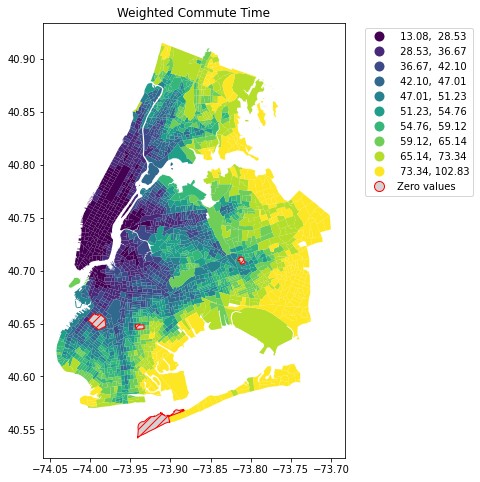

In [286]:
tract_info.plot(column = 'w_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Weighted Commute Time')
plt.show()

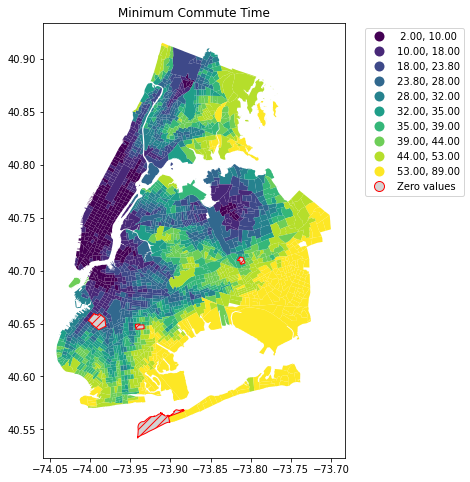

In [287]:
tract_info.plot(column = 'min_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Minimum Commute Time')
plt.show()

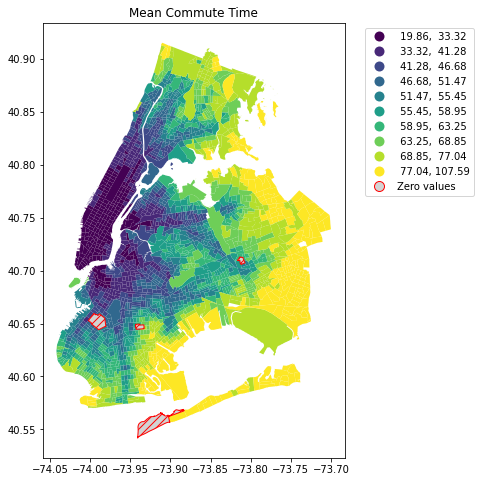

In [288]:
tract_info.plot(column = 'mean_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

<AxesSubplot:>

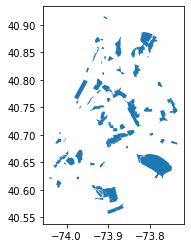

In [289]:
tract_info[tract_info['Median_Inc']==-666666666].plot()

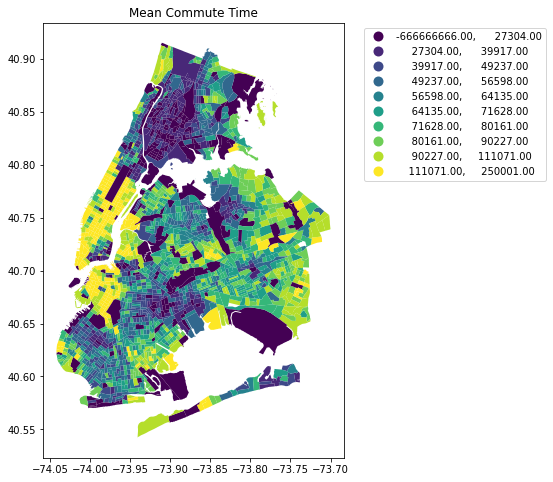

In [290]:
tract_info.plot(column = 'Median_Inc',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              #missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

# Look at Commute time distribution by Income Brackets for census tracts

In [291]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

#check if the distribution is normal using one-sample KS test and sample mean-std
def is_normal(x):
        return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [292]:
tract_info[['Median_Inc']].describe()

,Median_Inc
count,2.041000e+03
mean,-2.018327e+07
std,1.144555e+08
min,-6.666667e+08
25%,4.508200e+04
50%,6.413500e+04
75%,8.500000e+04
max,2.500010e+05


In [293]:
tract_info.loc[tract_info['Median_Inc']<0]=np.nan
tract_info.drop(index=tract_info[tract_info.w_tt.isna()].index,inplace=True)

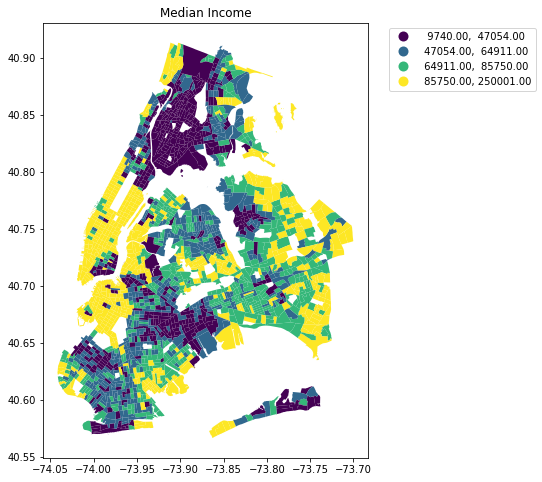

In [294]:
tract_info.plot(column = 'Median_Inc',figsize = (10,8), k=4, scheme='Quantiles', legend=True, 
              #missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Median Income')
plt.show()

In [295]:
tract_info['Median_q1']=((tract_info['Median_Inc']<np.quantile(tract_info['Median_Inc'],q=0.25))&(tract_info['Median_Inc']>=0))*1
tract_info['Median_q4']=(tract_info['Median_Inc']>=np.quantile(tract_info['Median_Inc'],q=0.75))*1
tract_info['Median_q2']=((tract_info['Median_Inc']>=np.quantile(tract_info['Median_Inc'],q=0.25))&(tract_info['Median_Inc']<np.quantile(tract_info['Median_Inc'],q=0.5)))*1
tract_info['Median_q3']=((tract_info['Median_Inc']>=np.quantile(tract_info['Median_Inc'],q=0.5))&(tract_info['Median_Inc']<np.quantile(tract_info['Median_Inc'],q=0.75)))*1

In [296]:
income_q1_df = tract_info[tract_info['Median_q1']==1]
income_q2_df = tract_info[tract_info['Median_q2']==1]
income_q3_df = tract_info[tract_info['Median_q3']==1]
income_q4_df = tract_info[tract_info['Median_q4']==1]

print(len(income_q1_df ),len(income_q2_df ),len(income_q3_df ),len(income_q4_df ))

494 494 494 495


Mean = 49.03
Standard deviation = 11.83
1 percentile = 23.35
5 percentile = 30.16
25 percentile = 41.64
50 percentile = 48.95
75 percentile = 55.03
95 percentile = 70.06
99 percentile = 81.56


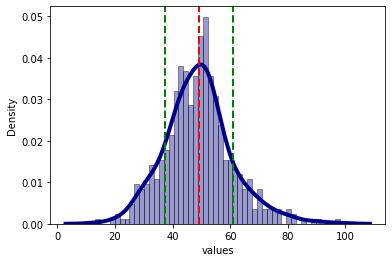

In [297]:
distribution_analysis(income_q1_df['w_tt'])

Mean = 50.65
Standard deviation = 12.01
1 percentile = 25.78
5 percentile = 32.02
25 percentile = 41.64
50 percentile = 51.18
75 percentile = 58.62
95 percentile = 70.81
99 percentile = 80.86


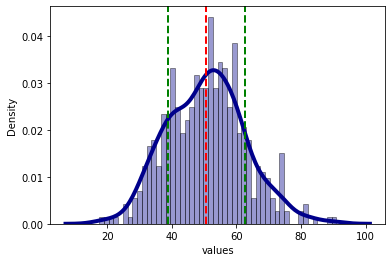

In [298]:
distribution_analysis(income_q2_df['w_tt'])

Mean = 56.61
Standard deviation = 15.08
1 percentile = 20.78
5 percentile = 32.27
25 percentile = 45.56
50 percentile = 56.64
75 percentile = 68.15
95 percentile = 79.90
99 percentile = 88.03


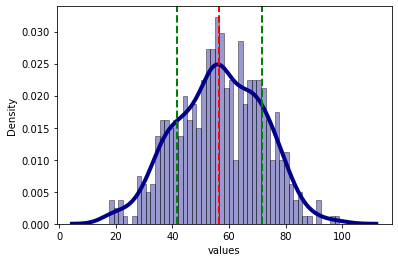

In [299]:
distribution_analysis(income_q3_df['w_tt'])

Mean = 46.86
Standard deviation = 23.16
1 percentile = 15.23
5 percentile = 17.16
25 percentile = 26.23
50 percentile = 40.52
75 percentile = 67.42
95 percentile = 85.33
99 percentile = 91.22


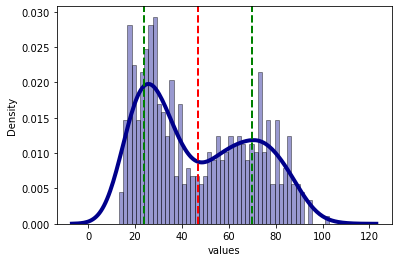

In [300]:
distribution_analysis(income_q4_df['w_tt'])

Mean = 26.57
Standard deviation = 18.09
1 percentile = 2.00
5 percentile = 6.00
25 percentile = 12.00
50 percentile = 18.00
75 percentile = 44.00
95 percentile = 57.00
99 percentile = 65.00


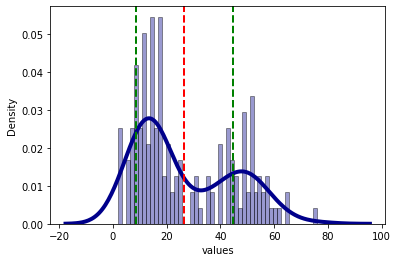

In [301]:
distribution_analysis(income_q4_df[income_q4_df['boro_name']=='Brooklyn']['min_tt'])

In [302]:
income_q4_df['boro_name'].unique()

array(['Manhattan', 'Brooklyn', 'Bronx', 'Queens'], dtype=object)

In [303]:
### t-tests the means

In [305]:
from scipy import stats

stats.ttest_ind(income_q2_df['w_tt'],income_q1_df['w_tt'])

Ttest_indResult(statistic=2.1356154252738024, pvalue=0.03295661913140624)

In [306]:
stats.ttest_ind(income_q2_df['w_tt'],income_q3_df['w_tt'])

Ttest_indResult(statistic=-6.872310587330012, pvalue=1.1184672851391843e-11)

In [307]:
stats.ttest_ind(income_q4_df['w_tt'],income_q3_df['w_tt'])

Ttest_indResult(statistic=-7.847070466740402, pvalue=1.1036766600470738e-14)

In [308]:
### k-s test for distribution
stats.ks_2samp(income_q2_df['w_tt'],income_q1_df['w_tt'])

KstestResult(statistic=0.11538461538461539, pvalue=0.0027621360226789482)

In [309]:
stats.ks_2samp(income_q2_df['w_tt'],income_q3_df['w_tt'])

KstestResult(statistic=0.23684210526315788, pvalue=1.4585254366647146e-12)

In [310]:
stats.ks_2samp(income_q4_df['w_tt'],income_q3_df['w_tt'])

KstestResult(statistic=0.3594160225739173, pvalue=4.4598909674253424e-29)

# Multivariate Regression
* Inputs: Income, race, age, job type

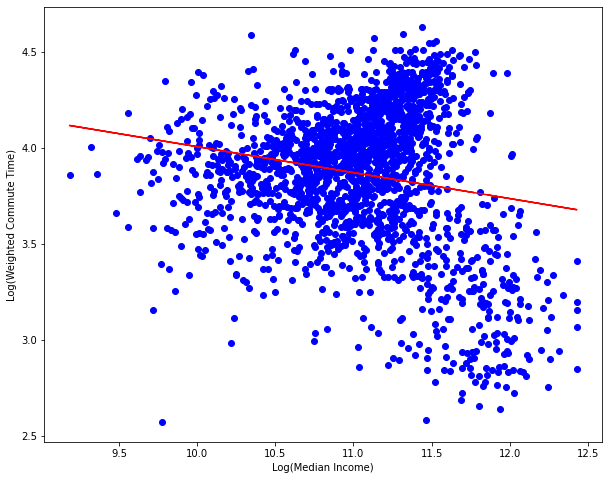

In [311]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Median_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Median Income)')
ax.set_ylabel('Log(Weighted Commute Time)')
# ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()

In [312]:
r_squared

0.034206206277229145

In [313]:
import statsmodels.api as sm
X = np.asarray(np.log(tract_info['Median_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
X = sm.add_constant(X)


# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     69.95
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.13e-16
Time:                        10:09:53   Log-Likelihood:                -793.04
No. Observations:                1977   AIC:                             1590.
Df Residuals:                    1975   BIC:                             1601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3612      0.179     29.965      0.0